In [1]:
#import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt


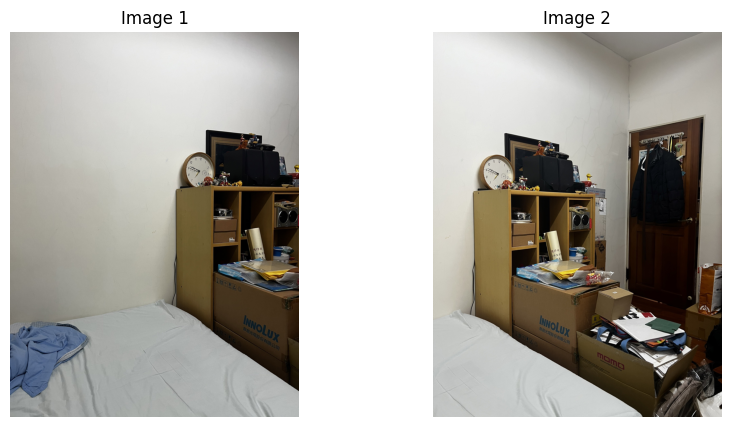

In [2]:
# Load images
image1 = cv2.imread('image1.jpg')
image2 = cv2.imread('image2.jpg')

# Convert images to RGB using OpenCV
image1_RGB = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_RGB = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Convert images to grayscale using OpenCV
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Show images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1_RGB)
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2_RGB)
plt.title('Image 2')
plt.axis('off')

plt.show()


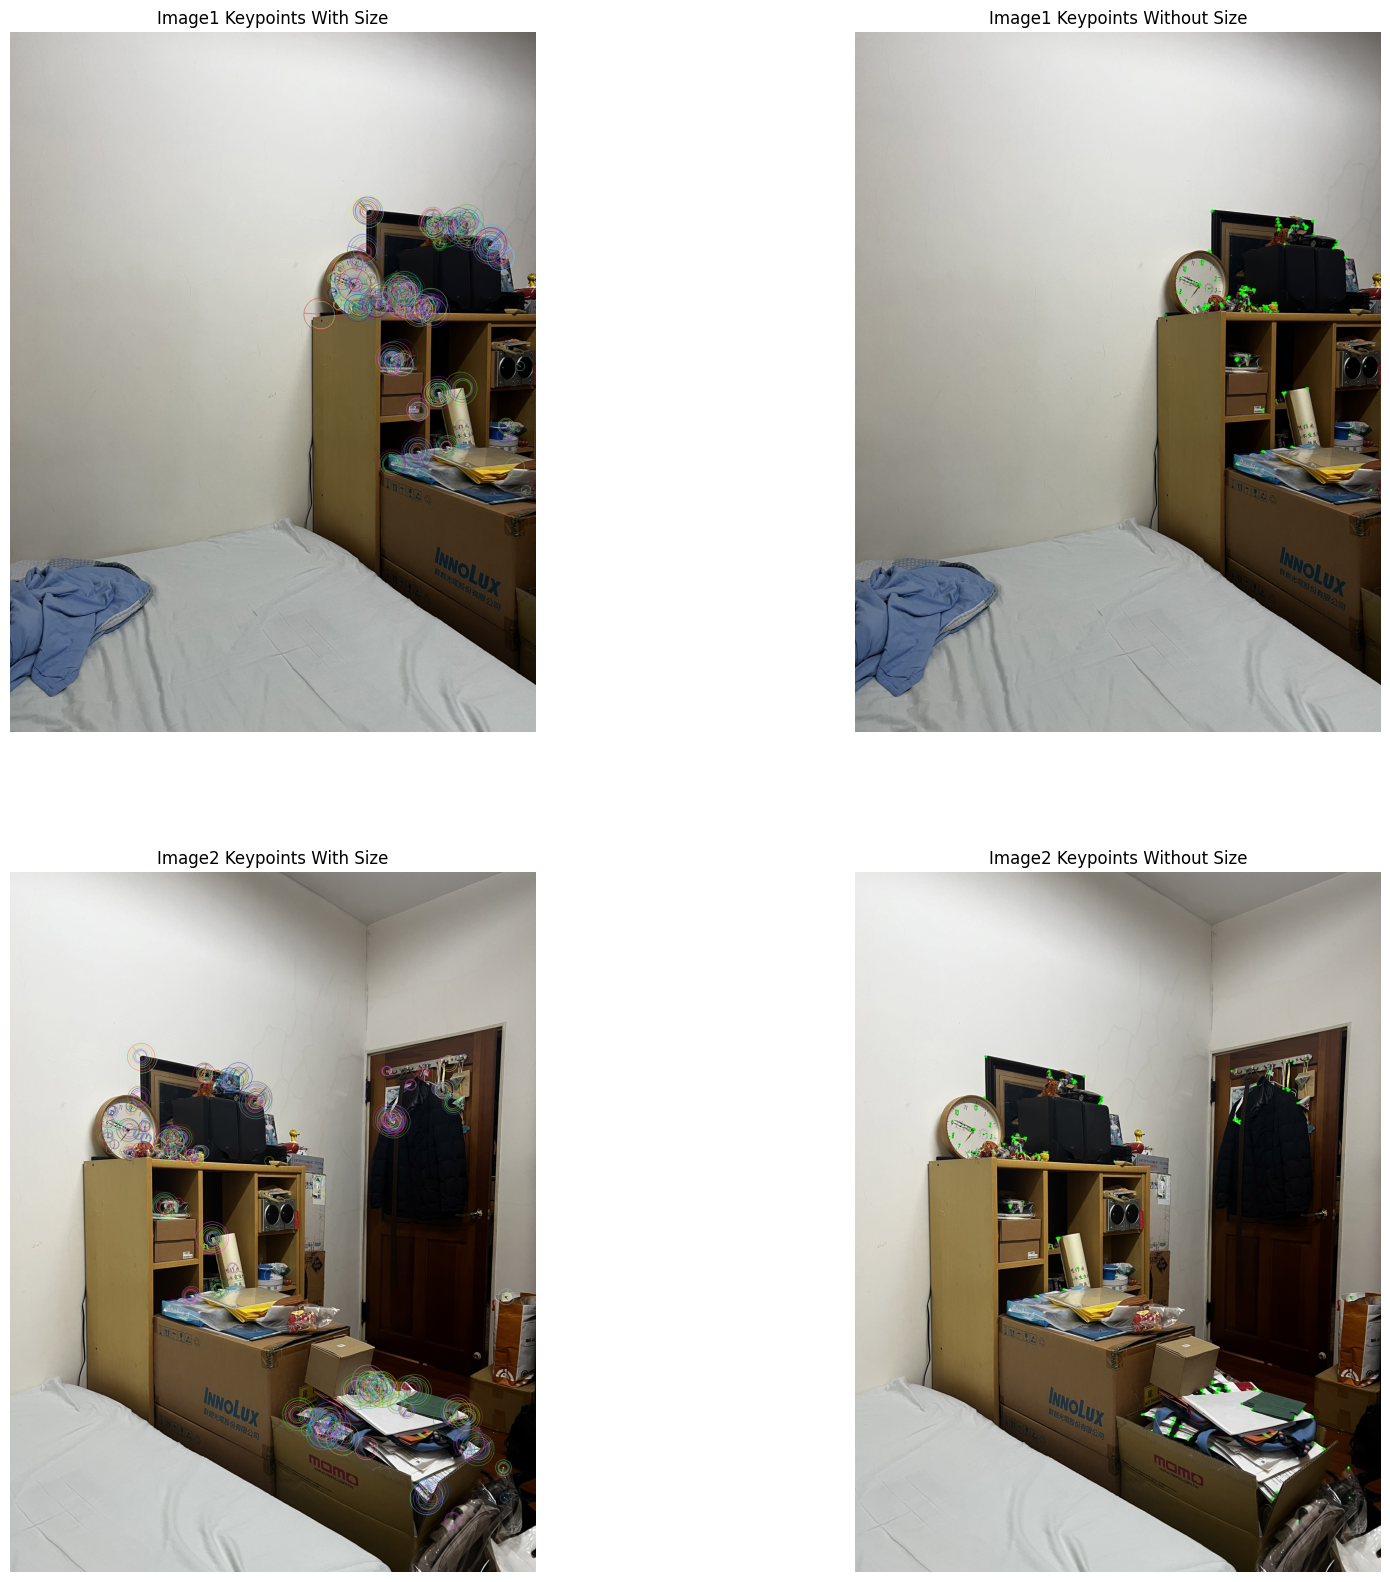

Number of Keypoints Detected In Image1:  500
Number of Keypoints Detected In Image2:  500


In [9]:
# Create an ORB object
orb = cv2.ORB_create()

# Detect keypoints and descriptors in the images
keypoints1, descriptors1 = orb.detectAndCompute(image1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2_gray, None)

# draw keypoints with size and without size
keypoints1_without_size = np.copy(image1_RGB)
keypoints1_with_size = np.copy(image1_RGB)

cv2.drawKeypoints(image1_RGB, keypoints1, keypoints1_without_size, color = (0, 255, 0))
cv2.drawKeypoints(image1_RGB, keypoints1, keypoints1_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

keypoints2_without_size = np.copy(image2_RGB)
keypoints2_with_size = np.copy(image2_RGB)

cv2.drawKeypoints(image2_RGB, keypoints2, keypoints2_without_size, color = (0, 255, 0))
cv2.drawKeypoints(image2_RGB, keypoints2, keypoints2_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# Plotting
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.imshow(keypoints1_with_size, cmap='gray')
plt.title('Image1 Keypoints With Size')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(keypoints1_without_size, cmap='gray')
plt.title("Image1 Keypoints Without Size")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(keypoints2_with_size, cmap='gray')
plt.title('Image2 Keypoints With Size')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(keypoints2_without_size, cmap='gray')
plt.title("Image2 Keypoints Without Size")
plt.axis('off')

plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In Image1: ", len(keypoints1))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In Image2: ", len(keypoints2))


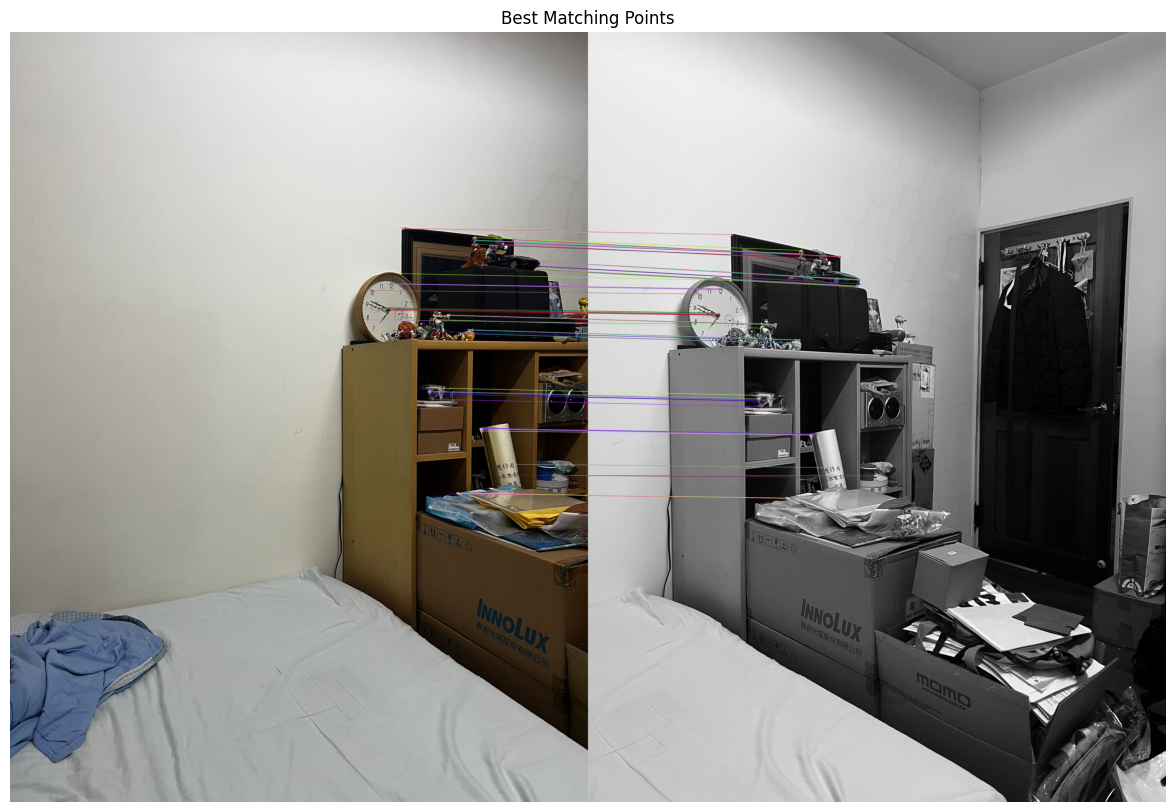


Number of Matching Keypoints Between The Training and Query Images:  70


In [4]:
# Create a BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors of the two images
matches = bf.match(descriptors1, descriptors2)

# Sort the matches based on distance and get the best matches, we can adjust the number of best matches
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:70]

# draw the best matching points on the images
matching_result = cv2.drawMatches(image1_RGB, keypoints1, image2_gray, keypoints2, good_matches, image2_gray, flags = 2)

# Plotting
plt.figure(figsize=(20, 10))
plt.imshow(matching_result)
plt.title('Best Matching Points')
plt.axis('off')
plt.show()


# Print number of good matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(good_matches))

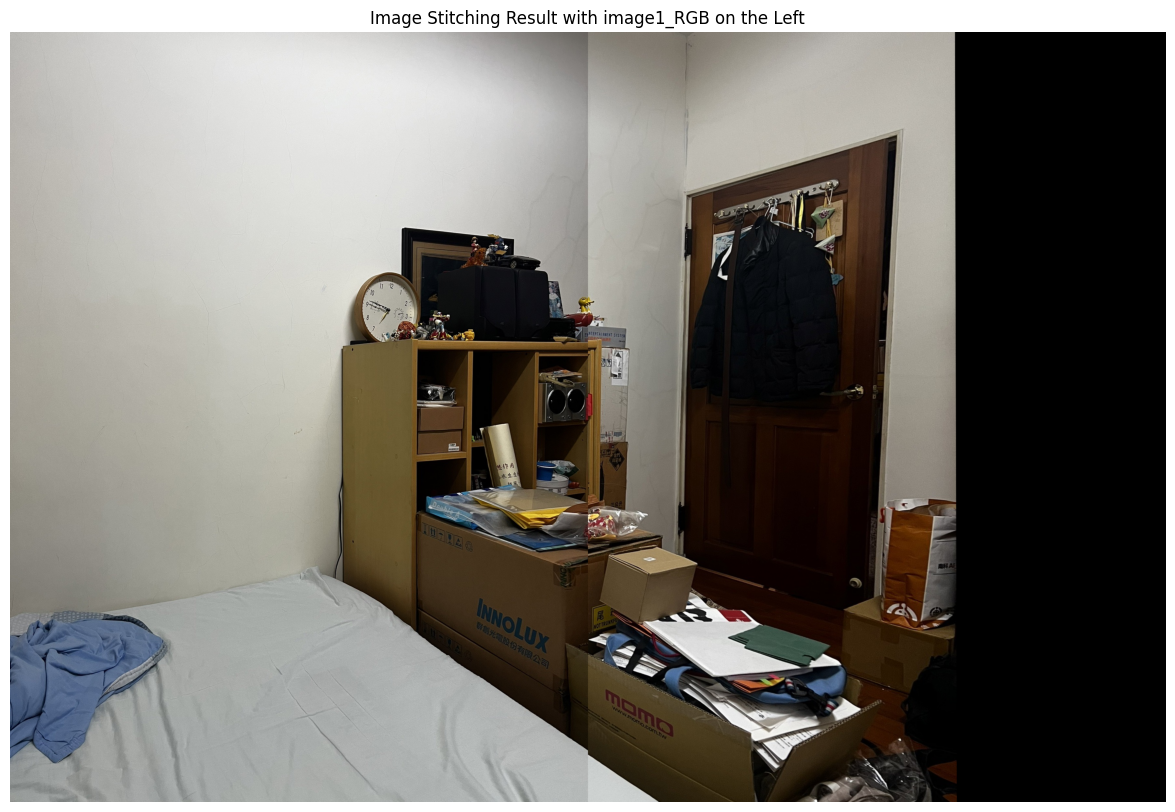

In [5]:
# 
if len(good_matches) > 4:

    # Extract location of good matches
    src_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Find the transformation matrix using RANSAC
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
    # Get the size of image2
    h, w, _ = image2_RGB.shape

    # Use the warpPerspective function to warp image2 to image1
    warpImg = cv2.warpPerspective(image2_RGB, M, (image1_RGB.shape[1] + image2_RGB.shape[1], image1_RGB.shape[0]))
    
    # Add image1 to the left side of warpImg
    warpImg[0:image1_RGB.shape[0], 0:image1_RGB.shape[1]] = image1_RGB
    
    #Plotting
    plt.figure(figsize=(20, 10))
    plt.imshow(warpImg)
    plt.title('Image Stitching Result with image1_RGB on the Left')
    plt.axis('off')
    plt.show()
else:
    print("Not enough matches are found - {}/{}".format(len(matches), 4))